In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.uniform(-3,3,size=100)

In [4]:
X=x.reshape(-1,1)

In [9]:
y=0.5*x**2+x+2+np.random.normal(0,1,size=100)

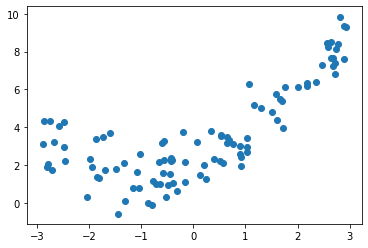

In [10]:
plt.scatter(x,y)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_predict=lin_reg.predict(X)

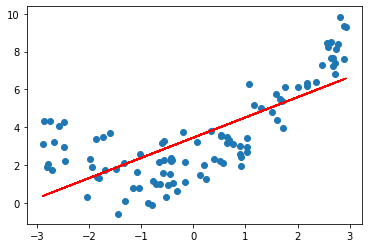

In [15]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='r')
plt.show()

### 解决方案 添加一个特征

In [16]:
(X**2).shape

(100, 1)

In [17]:
X2=np.hstack([X,X**2])

In [18]:
X2.shape

(100, 2)

In [20]:
lin_reg2=LinearRegression()
lin_reg2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_predict2=lin_reg2.predict(X2)

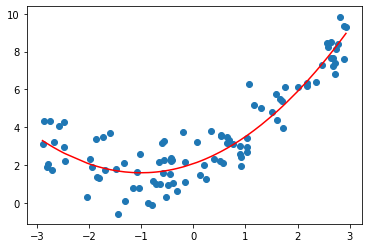

In [25]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [26]:
lin_reg2.coef_

array([0.95582556, 0.47474481])

### scikit-learn中的多项式回归和Pipeline

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly=PolynomialFeatures(degree=2)

In [30]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [31]:
X2=poly.transform(X)

In [32]:
X2.shape

(100, 3)

In [34]:
X2[:5,:]

array([[ 1.        ,  0.64334081,  0.4138874 ],
       [ 1.        ,  2.18616599,  4.77932173],
       [ 1.        ,  1.06204036,  1.12792972],
       [ 1.        ,  2.77852824,  7.7202192 ],
       [ 1.        , -2.87711659,  8.27779987]])

In [35]:
lin_reg3=LinearRegression()
lin_reg3.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_predict3=lin_reg3.predict(X2)

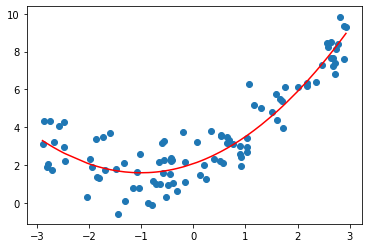

In [41]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict3[np.argsort(x)],color='r')

### 关于PolynomialFeatures

In [43]:
X=np.arange(1,11).reshape(-1,2)

In [44]:
X.shape

(5, 2)

In [47]:
poly=PolynomialFeatures(degree=2)
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [48]:
X2=poly.transform(X)

In [49]:
X2.shape

(5, 6)

In [50]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

In [53]:
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1)
y=0.5*x**2+2+np.random.normal(0,1,100)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
poly_reg=Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [60]:
poly_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [62]:
y_predict=poly_reg.predict(X)

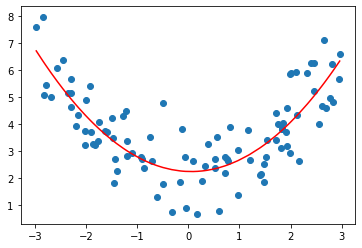

In [64]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')

In [67]:
from sklearn.metrics import mean_squared_error
y_predict=lin_reg.predict(X)
mean_squared_error(y,y_predict)

5.975881853961727

In [68]:
y_predict=poly_reg.predict(X)
mean_squared_error(y,y_predict)

0.838775966195726